<h1><centre>Naive Bayes classifier to classify Unstructured Data</h1></centre>

In [1]:
# scrapping libraries
from GoogleNews import GoogleNews
import gensim

In [2]:
#libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import nltk
import random
from wordcloud import WordCloud
import os
import spacy
from textblob import TextBlob
from nltk.corpus import brown

In [3]:
import string
string.punctuation
import re
import collections
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from nltk.util import ngrams
import datetime as dt
from datetime import date
import calendar

In [4]:
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\ranji\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

**Scrapping cybercrime data from google news**

In [5]:
googlenews=GoogleNews(start='09/10/2022',end='11/10/2022') #for 30 days
googlenews.search('cyber crime')
result=googlenews.result()
df=pd.DataFrame(result)
df.head()

,title,media,date,datetime,desc,link,img
0,Australia blames cyber criminals in Russia for...,CNN,4 days ago,2022-11-11 18:04:53.938207,Links to notorious Russian hackers. Cyber secu...,https://www.cnn.com/2022/11/11/tech/medibank-a...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Hacker demands $10m to stop leaking Australian...,Al Jazeera,5 days ago,2022-11-10 18:04:53.964787,A cyber-extortionist has demanded almost $10 m...,https://www.aljazeera.com/economy/2022/11/10/h...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,"What do we know about REvil, the Russian ranso...",The Conversation,4 days ago,2022-11-11 18:04:53.987725,Australian Federal Police Commissioner Reece K...,https://theconversation.com/what-do-we-know-ab...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Explained: Why Are There So Many Data Breaches...,The Wire,3 weeks ago,2022-10-25 18:04:54.016813,Hackers and initial access brokers are just on...,https://thewire.in/tech/explained-why-are-ther...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Haryana Police to observe 'cybersecurity month...,The Indian Express,1 month ago,2022-10-15 18:04:54.045819,The state police's cyber cell helpline number ...,https://indianexpress.com/article/cities/chand...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [6]:
#creating a dataframe
for i in range(2,100):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)

'NoneType' object has no attribute 'group'
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'None

In [7]:
df

,title,media,date,datetime,desc,link,img
0,Australia blames cyber criminals in Russia for...,CNN,4 days ago,2022-11-11 18:04:53.938207,Links to notorious Russian hackers. Cyber secu...,https://www.cnn.com/2022/11/11/tech/medibank-a...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Hacker demands $10m to stop leaking Australian...,Al Jazeera,5 days ago,2022-11-10 18:04:53.964787,A cyber-extortionist has demanded almost $10 m...,https://www.aljazeera.com/economy/2022/11/10/h...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,"What do we know about REvil, the Russian ranso...",The Conversation,4 days ago,2022-11-11 18:04:53.987725,Australian Federal Police Commissioner Reece K...,https://theconversation.com/what-do-we-know-ab...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Explained: Why Are There So Many Data Breaches...,The Wire,3 weeks ago,2022-10-25 18:04:54.016813,Hackers and initial access brokers are just on...,https://thewire.in/tech/explained-why-are-ther...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Haryana Police to observe 'cybersecurity month...,The Indian Express,1 month ago,2022-10-15 18:04:54.045819,The state police's cyber cell helpline number ...,https://indianexpress.com/article/cities/chand...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...
279,Think you're immune to cybercrime because you'...,Local News 8,1 week ago,2022-11-08 18:05:32.753625,BestForBest // Shutterstock. Think you're immu...,https://localnews8.com/news/crime-tracker/2022...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
280,Live breaking news: William Tyrrell's foster m...,9News,1 week ago,2022-11-08 18:05:33.747813,"And there has been a jump in cybercrime, with ...",https://www.9news.com.au/national/australia-br...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
281,Cyber victims urged to report crime,PS News,1 week ago,2022-11-08 18:05:33.770467,Australian victims of cybercrime are being urg...,https://psnews.com.au/2022/11/08/cyber-victims...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
282,"As Cybercrime Becomes More Prevalent, Public I...",Bisnow,5 days ago,2022-11-10 18:05:33.793513,"As Cybercrime Becomes More Prevalent, Public I...",https://www.bisnow.com/washington-dc/news/comm...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [8]:
df.shape

(284, 7)

In [9]:
#checking for null values
df.isnull().sum()

title        0
media        0
date         0
datetime    38
desc         0
link         0
img          0
dtype: int64

There is no null values in the dataset.

**Separating categorical and numerical**

In [10]:
categorical = df.select_dtypes(include=object)
numerical = df.select_dtypes(exclude=object)

In [11]:
print("categorical attributes:",categorical.shape[1])
print("numerical attributes:",numerical.shape[1])

categorical attributes: 6
numerical attributes: 1


**dropping image and link attribute from the dataset**

In [12]:
df.drop(['link','img'], axis=1, inplace=True)
df.head(2)

,title,media,date,datetime,desc
0,Australia blames cyber criminals in Russia for...,CNN,4 days ago,2022-11-11 18:04:53.938207,Links to notorious Russian hackers. Cyber secu...
1,Hacker demands $10m to stop leaking Australian...,Al Jazeera,5 days ago,2022-11-10 18:04:53.964787,A cyber-extortionist has demanded almost $10 m...


**Text Pre-processing**

In [13]:
#Lower casing
df['desc'] = df['desc'].str.lower()

In [14]:
#Removal of Punctuations
df['desc'] = df['desc'].apply(lambda x :re.sub(r'[^\w\s]','',x))

In [15]:
#Tokenization
df.insert(5, 'desc_tokenized', df['desc'].apply(lambda x:word_tokenize(x)))

In [16]:
#Removal of stopwords
stop = stopwords.words('english')
df.insert(6, 'no_stopwords', df['desc'].apply(lambda x:' '.join([word for word in x.split() if word not in stop])))

In [17]:
#finding repeated words
from collections import Counter
cnt = Counter()
for text in df['no_stopwords'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('cyber', 269),
 ('crime', 166),
 ('cybercrime', 99),
 ('police', 97),
 ('criminals', 39),
 ('security', 30),
 ('crimes', 28),
 ('awareness', 23),
 ('fraud', 21),
 ('said', 20)]

Based upon this repeated words, we are going to create a corpus.

In [18]:
#stemming
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text.split()]
    return stem_text

In [19]:
df.insert(7, 'msg_stemmed', df['no_stopwords'].apply(lambda x: stemming(x)))

In [20]:
#lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    return lemm_text

In [21]:
df.insert(8, 'msg_lemmatized', df['no_stopwords'].apply(lambda x:lemmatizer(x)))

In [22]:
df.head()

,title,media,date,datetime,desc,desc_tokenized,no_stopwords,msg_stemmed,msg_lemmatized
0,Australia blames cyber criminals in Russia for...,CNN,4 days ago,2022-11-11 18:04:53.938207,links to notorious russian hackers cyber secur...,"[links, to, notorious, russian, hackers, cyber...",links notorious russian hackers cyber security...,"[link, notori, russian, hacker, cyber, secur, ...","[link, notorious, russian, hacker, cyber, secu..."
1,Hacker demands $10m to stop leaking Australian...,Al Jazeera,5 days ago,2022-11-10 18:04:53.964787,a cyberextortionist has demanded almost 10 mil...,"[a, cyberextortionist, has, demanded, almost, ...",cyberextortionist demanded almost 10 million s...,"[cyberextortionist, demand, almost, 10, millio...","[cyberextortionist, demanded, almost, 10, mill..."
2,"What do we know about REvil, the Russian ranso...",The Conversation,4 days ago,2022-11-11 18:04:53.987725,australian federal police commissioner reece k...,"[australian, federal, police, commissioner, re...",australian federal police commissioner reece k...,"[australian, feder, polic, commission, reec, k...","[australian, federal, police, commissioner, re..."
3,Explained: Why Are There So Many Data Breaches...,The Wire,3 weeks ago,2022-10-25 18:04:54.016813,hackers and initial access brokers are just on...,"[hackers, and, initial, access, brokers, are, ...",hackers initial access brokers one part comple...,"[hacker, initi, access, broker, one, part, com...","[hacker, initial, access, broker, one, part, c..."
4,Haryana Police to observe 'cybersecurity month...,The Indian Express,1 month ago,2022-10-15 18:04:54.045819,the state polices cyber cell helpline number 1...,"[the, state, polices, cyber, cell, helpline, n...",state polices cyber cell helpline number 1930 ...,"[state, polic, cyber, cell, helplin, number, 1...","[state, police, cyber, cell, helpline, number,..."


**Polarity- positive & negative**

In [23]:
sen_alz = SentimentIntensityAnalyzer()
polarity = []
for i in df["desc"]:
    polarity.append(sen_alz.polarity_scores(i)['compound'])
polarity = np.array(polarity)
df['polarity']=polarity

In [24]:
col         = 'polarity'
conditions  = [df[col] >= 0, df[col] < 0]
choices     = ['Positive', 'Negative']
    
df["Sentiment"] = np.select(conditions, choices, default=np.nan)

In [25]:
sentiment=df["Sentiment"]
polarity=df['polarity']

In [26]:
sentiment

0      Negative
1      Negative
2      Negative
3      Positive
4      Negative
         ...   
279    Negative
280    Negative
281    Negative
282    Positive
283    Negative
Name: Sentiment, Length: 284, dtype: object

In [27]:
df.groupby('Sentiment')['polarity'].count()

Sentiment
Negative    224
Positive     60
Name: polarity, dtype: int64

There are 228 negative news and 63 positive news in the dataset.

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

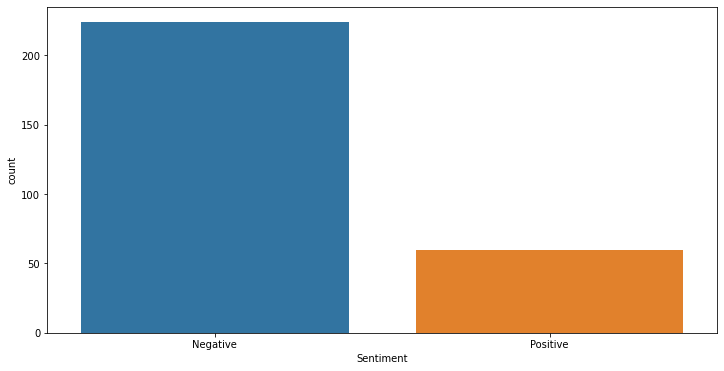

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sentiment'],data=df)

<AxesSubplot:xlabel='Sentiment'>

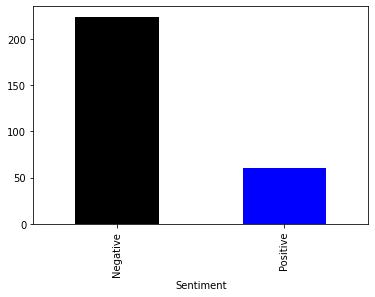

In [29]:
df.groupby('Sentiment')['polarity'].count().plot(kind='bar', figsize=(6,4), width=0.5, color=['black', 'blue'])

In [30]:
df.groupby('Sentiment')['polarity'].mean()

Sentiment
Negative   -0.627443
Positive    0.264268
Name: polarity, dtype: float64

Negative has the mean of -0.62 and positive has the mean 0f 0.25 

**Wordcloud**

In [31]:
#Positive news
positive_news = df.loc[df['Sentiment']=='Positive']
pos_news = ' '.join(positive_news['no_stopwords'])

In [35]:
#Negative news
negative_news = df.loc[df['Sentiment']=='Negative']
neg_news = ' '.join(negative_news['no_stopwords'])

Text(0.5, 1.0, 'Positive_news word cloud')

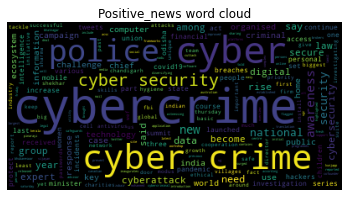

In [36]:
positive_cloud = WordCloud()
positive_cloud = positive_cloud.generate(pos_news)
plt.imshow(positive_cloud)
plt.axis('off')
plt.title("Positive_news word cloud")

Text(0.5, 1.0, 'negative_news word cloud')

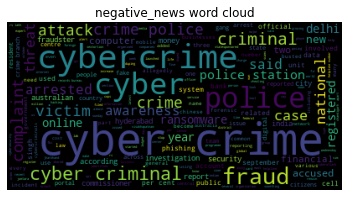

In [37]:
negative_cloud = WordCloud()
negative_cloud = negative_cloud.generate(neg_news)
plt.imshow(negative_cloud)
plt.axis('off')
plt.title("negative_news word cloud")

**Creating corpus**

Based upon those repeated words we find earlier, we are going to create a corpus for 'adventure'.

In [38]:
df['msg_lemmatized']

0      [link, notorious, russian, hacker, cyber, secu...
1      [cyberextortionist, demanded, almost, 10, mill...
2      [australian, federal, police, commissioner, re...
3      [hacker, initial, access, broker, one, part, c...
4      [state, police, cyber, cell, helpline, number,...
                             ...                        
279    [bestforbest, shutterstock, think, youre, immu...
280    [jump, cybercrime, australian, reporting, fost...
281    [australian, victim, cybercrime, urged, report...
282    [cybercrime, becomes, prevalent, public, insur...
283    [153, per, cent, increase, cyber, fraud, compl...
Name: msg_lemmatized, Length: 284, dtype: object

In [39]:
from nltk.corpus import names

In [40]:
gov = brown.words(categories='adventure')
name = names.words()

In [41]:
corpus = np.array(df['desc'])

In [42]:
df.dropna(thresh=5)

,title,media,date,datetime,desc,desc_tokenized,no_stopwords,msg_stemmed,msg_lemmatized,polarity,Sentiment
0,Australia blames cyber criminals in Russia for...,CNN,4 days ago,2022-11-11 18:04:53.938207,links to notorious russian hackers cyber secur...,"[links, to, notorious, russian, hackers, cyber...",links notorious russian hackers cyber security...,"[link, notori, russian, hacker, cyber, secur, ...","[link, notorious, russian, hacker, cyber, secu...",-0.7964,Negative
1,Hacker demands $10m to stop leaking Australian...,Al Jazeera,5 days ago,2022-11-10 18:04:53.964787,a cyberextortionist has demanded almost 10 mil...,"[a, cyberextortionist, has, demanded, almost, ...",cyberextortionist demanded almost 10 million s...,"[cyberextortionist, demand, almost, 10, millio...","[cyberextortionist, demanded, almost, 10, mill...",-0.6908,Negative
2,"What do we know about REvil, the Russian ranso...",The Conversation,4 days ago,2022-11-11 18:04:53.987725,australian federal police commissioner reece k...,"[australian, federal, police, commissioner, re...",australian federal police commissioner reece k...,"[australian, feder, polic, commission, reec, k...","[australian, federal, police, commissioner, re...",-0.7579,Negative
3,Explained: Why Are There So Many Data Breaches...,The Wire,3 weeks ago,2022-10-25 18:04:54.016813,hackers and initial access brokers are just on...,"[hackers, and, initial, access, brokers, are, ...",hackers initial access brokers one part comple...,"[hacker, initi, access, broker, one, part, com...","[hacker, initial, access, broker, one, part, c...",0.0000,Positive
4,Haryana Police to observe 'cybersecurity month...,The Indian Express,1 month ago,2022-10-15 18:04:54.045819,the state polices cyber cell helpline number 1...,"[the, state, polices, cyber, cell, helpline, n...",state polices cyber cell helpline number 1930 ...,"[state, polic, cyber, cell, helplin, number, 1...","[state, police, cyber, cell, helpline, number,...",-0.4939,Negative
...,...,...,...,...,...,...,...,...,...,...,...
279,Think you're immune to cybercrime because you'...,Local News 8,1 week ago,2022-11-08 18:05:32.753625,bestforbest shutterstock think youre immune t...,"[bestforbest, shutterstock, think, youre, immu...",bestforbest shutterstock think youre immune cy...,"[bestforbest, shutterstock, think, your, immun...","[bestforbest, shutterstock, think, youre, immu...",-0.0772,Negative
280,Live breaking news: William Tyrrell's foster m...,9News,1 week ago,2022-11-08 18:05:33.747813,and there has been a jump in cybercrime with a...,"[and, there, has, been, a, jump, in, cybercrim...",jump cybercrime australians reporting foster m...,"[jump, cybercrim, australian, report, foster, ...","[jump, cybercrime, australian, reporting, fost...",-0.6908,Negative
281,Cyber victims urged to report crime,PS News,1 week ago,2022-11-08 18:05:33.770467,australian victims of cybercrime are being urg...,"[australian, victims, of, cybercrime, are, bei...",australian victims cybercrime urged report ran...,"[australian, victim, cybercrim, urg, report, r...","[australian, victim, cybercrime, urged, report...",-0.7845,Negative
282,"As Cybercrime Becomes More Prevalent, Public I...",Bisnow,5 days ago,2022-11-10 18:05:33.793513,as cybercrime becomes more prevalent public in...,"[as, cybercrime, becomes, more, prevalent, pub...",cybercrime becomes prevalent public insurance ...,"[cybercrim, becom, preval, public, insur, adju...","[cybercrime, becomes, prevalent, public, insur...",0.0000,Positive


In [43]:
labeled_names = ([(word, 'individual') for sent in df.iloc[:, 6] for word in sent.split() if word.capitalize() in name] + [(word, 'adventure') for sent in df.iloc[:, 6] for word in sent.split() if word in gov])

In [44]:
np.random.shuffle(labeled_names)
def features(word):
    return {'word': word.lower()}

**Naive bayes classifier**

In [45]:
featuresets = [(features(n), category) for (n, category) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [46]:
classifier.show_most_informative_features()

Most Informative Features
                    word = 'major'        indivi : advent =     14.0 : 1.0
                    word = 'case'         indivi : advent =      6.8 : 1.0
                    word = 'say'          indivi : advent =      4.7 : 1.0
                    word = 'carry'        indivi : advent =      4.7 : 1.0
                    word = 'hall'         indivi : advent =      4.7 : 1.0
                    word = 'may'          indivi : advent =      4.7 : 1.0
                    word = 'wake'         indivi : advent =      4.7 : 1.0
                    word = 'worth'        indivi : advent =      2.8 : 1.0


In [47]:
print("Train set accuracy : ", nltk.classify.accuracy(classifier, train_set))

Train set accuracy :  0.964260686755431


In [48]:
print("Test set accuracy : ", nltk.classify.accuracy(classifier, test_set))

Test set accuracy :  0.98
